In [27]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver")
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine")

from distribution_operation import *
from utils import *
from numerical_routine import *
from posterior_computation import *
from ash import *

In [28]:
import numpy as np

In [29]:
n=1000

In [30]:
betahat = np.array([1, 2, 3, 4, 5])
sebetahat = np.array([1, 0.4, 5, 1, 1])
 
scale = autoselect_scales_mix_exp(betahat=betahat, sebetahat=sebetahat )
L = get_data_loglik_exp(betahat=betahat, sebetahat=sebetahat,   scale=scale)
exp_L = np.exp(L)
optimal_pi = optimize_pi(exp_L, penalty=10, verbose=False)
out = posterior_mean_exp(
        betahat,
        sebetahat,
        log_pi=np.log(optimal_pi + 1e-32),
        scale=scale
    )

C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine.py:87: RuntimeWarning: invalid value encountered in multiply
  alpha_frac = alpha * np.exp( np.clip(stats.norm.logpdf(alpha) - pnorm_diff, None, 300))


In [31]:
res= ash(betahat, sebetahat, prior="exp")
res.pi 

array([7.54197100e-01, 1.76702938e-11, 1.78160344e-11, 1.80223138e-11,
       1.83146990e-11, 1.87375353e-11, 1.94253344e-11, 2.09441353e-11,
       2.51185263e-11, 3.58721148e-11, 6.04197486e-11, 1.15894072e-10,
       2.60987406e-10, 2.24338764e-06, 9.20140421e-02, 1.53746415e-01,
       4.01978226e-05, 4.19178644e-10])

In [32]:
L

array([[ -1.41893853,  -1.38123973,  -1.36312464,  -1.33705821,
         -1.30082832,  -1.2538323 ,  -1.20079393,  -1.15642191,
         -1.14499733,  -1.1906699 ,  -1.30638599,  -1.4913827 ,
         -1.73599675,  -2.02751161,  -2.35385632],
       [-12.5026478 , -11.87740939, -11.40220327, -10.40992311,
         -8.63586089,  -6.51698062,  -4.67152354,  -3.31773067,
         -2.43508985,  -1.93056714,  -1.70659371,  -1.68230841,
         -1.79677333,  -2.00623835,  -2.28014784],
       [ -2.70837645,  -2.70380126,  -2.70155115,  -2.69822387,
         -2.69334304,  -2.68627697,  -2.67627455,  -2.66267476,
         -2.64555985,  -2.62730781,  -2.61522375,  -2.62361688,
         -2.67146561,  -2.77487196,  -2.94044567],
       [ -8.91893853,  -8.75359393,  -8.66156346,  -8.50992587,
         -8.24776001,  -7.77125388,  -6.92986458,  -5.73769819,
         -4.51037924,  -3.52640669,  -2.86567228,  -2.49745033,
         -2.35908061,  -2.38951026,  -2.53940263],
       [-13.41893853, -13.20

In [33]:
log_pi=np.log(optimal_pi + 1e-32)
assignment = np.exp(log_pi)
assignment = assignment / assignment.sum()

In [34]:
np.log(optimal_pi+1e-32)

array([ -0.28199458, -73.68272298, -73.68272298, -73.68272298,
       -73.68272298, -73.68272298, -73.68272298, -73.68272298,
       -73.68272298, -38.68271072, -26.47497446,  -6.86536777,
        -1.40858159,  -8.57320276, -25.76643222])

In [35]:
log_pi=  np.tile(np.log(optimal_pi+1e-32), (betahat.shape[0],1))
 


In [36]:
assignment = np.exp(log_pi)
assignment = assignment / assignment.sum( )
mu = 0
post_assign = np.zeros((betahat.shape[0], scale.shape[0]))

In [37]:
w=assignment

In [38]:
log_pi

array([[ -0.28199458, -73.68272298, -73.68272298, -73.68272298,
        -73.68272298, -73.68272298, -73.68272298, -73.68272298,
        -73.68272298, -38.68271072, -26.47497446,  -6.86536777,
         -1.40858159,  -8.57320276, -25.76643222],
       [ -0.28199458, -73.68272298, -73.68272298, -73.68272298,
        -73.68272298, -73.68272298, -73.68272298, -73.68272298,
        -73.68272298, -38.68271072, -26.47497446,  -6.86536777,
         -1.40858159,  -8.57320276, -25.76643222],
       [ -0.28199458, -73.68272298, -73.68272298, -73.68272298,
        -73.68272298, -73.68272298, -73.68272298, -73.68272298,
        -73.68272298, -38.68271072, -26.47497446,  -6.86536777,
         -1.40858159,  -8.57320276, -25.76643222],
       [ -0.28199458, -73.68272298, -73.68272298, -73.68272298,
        -73.68272298, -73.68272298, -73.68272298, -73.68272298,
        -73.68272298, -38.68271072, -26.47497446,  -6.86536777,
         -1.40858159,  -8.57320276, -25.76643222],
       [ -0.28199458, -73.68

In [39]:
i=1

wpost_exp(x=betahat[i],
                                    s=sebetahat[i], 
                                    w=assignment[i,:] ,
                                    scale=scale)

array([6.87692621e-05, 8.51864755e-16, 1.37009300e-15, 3.69565862e-15,
       2.17849856e-14, 1.81290601e-13, 1.14774951e-12, 4.44418252e-12,
       1.07428107e-11, 1.77921877e-11, 2.22586990e-11, 4.75866798e-03,
       9.94548683e-01, 6.23880066e-04, 1.61889636e-11])

In [40]:
true_val1=  np.random.normal(loc=0, scale=2, size=100)
true_val0=  np.zeros( 100)

observations_mu_1 =true_val1+np.random.normal(loc=0, scale=1, size=100)
observations_mu_0 =true_val0+ np.random.normal(loc=0, scale=1, size=100)
# Combine them into one array
betahat = np.hstack([observations_mu_1, observations_mu_0])
sebetahat=  np.repeat(1, betahat.shape[0])
mult=1.5

In [41]:
res= ash(betahat, sebetahat, prior="exp")
res.pi 

array([7.88711850e-01, 3.56473254e-05, 4.94696445e-06, 5.94188700e-07,
       7.33246964e-08, 1.52133164e-08, 1.35546860e-08, 1.54329194e-07,
       2.39638147e-05, 6.95418075e-03, 1.73973285e-01, 3.02832481e-02,
       1.20267241e-05, 4.18050766e-10, 2.01293933e-10, 1.14412342e-10])

In [42]:
res.scale

array([ 0.        ,  0.0854386 ,  0.12082842,  0.1708772 ,  0.24165685,
        0.34175439,  0.48331369,  0.68350878,  0.96662739,  1.36701756,
        1.93325478,  2.73403513,  3.86650956,  5.46807025,  7.73301911,
       10.93614051])

Text(0, 0.5, 'posterior mean')

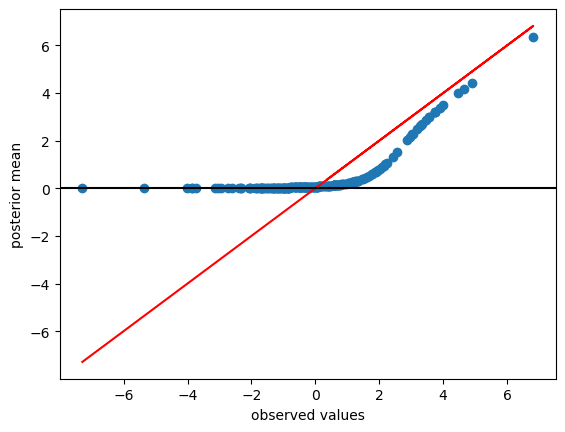

In [43]:
plt.scatter(betahat, res.post_mean  )
plt.xlabel("observed values")
plt.plot(betahat, betahat, color='red', label='x = y')
plt.axhline(y=0, color="black")
plt.ylabel("posterior mean")

In [44]:
betahat=  np.array([1,2,-30000,4,5])
sebetahat=np.array([1e-6,0.4,1e-6,10000,1])

In [45]:
res= ash(betahat, sebetahat)

In [46]:
res= ash(betahat, sebetahat, prior="exp")
print(res.pi) 

[7.00869937e-01 8.53978352e-03 7.63329082e-12 8.54872792e-03
 7.67352848e-12 7.68970601e-12 8.54696420e-03 7.69381384e-12
 8.54713172e-03 7.69444825e-12 8.54722887e-03 7.69524127e-12
 8.54726897e-03 7.69685902e-12 7.71367097e-12 8.57183996e-03
 1.01465185e-11 1.82251040e-11 3.87561094e-11 8.23604677e-11
 2.15605296e-02 3.76102974e-10 6.16633302e-06 2.33908990e-02
 1.91856733e-01 2.46671612e-03 7.22989141e-08 2.80465476e-10
 1.54606042e-10 9.52598159e-11 6.30557828e-11 4.40043399e-11
 3.20834470e-11 2.43385946e-11 1.91760576e-11 1.56730977e-11
 1.32662135e-11 1.15970408e-11 1.04302916e-11 9.60696602e-12
 9.01593086e-12 8.57487097e-12 8.21633238e-12 7.87692134e-12
 7.49153120e-12 6.99833842e-12 6.35783489e-12 5.57523868e-12
 4.70437974e-12 3.82479762e-12 3.00959258e-12 2.30521951e-12
 1.72875999e-12]


Text(0, 0.5, 'posterior mean')

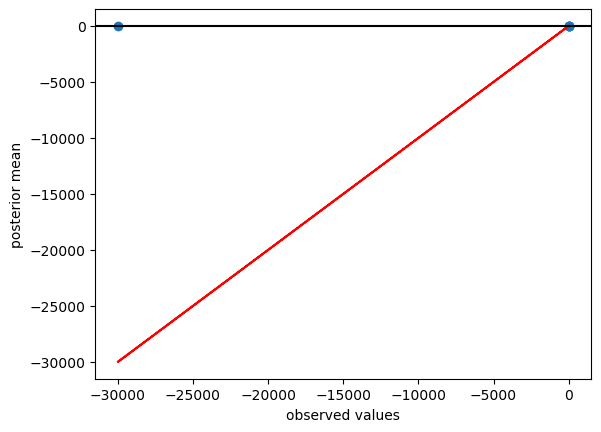

In [47]:
plt.scatter(betahat, res.post_mean  )
plt.xlabel("observed values")
plt.plot(betahat, betahat, color='red', label='x = y')
plt.axhline(y=0, color="black")
plt.ylabel("posterior mean")

In [48]:
res.post_mean

array([1.        , 1.93050488, 0.        , 0.59857401, 4.62006475])

In [49]:
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver")
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine")
from numerical_routine import *
from scipy.stats import norm
from ebnm_point_exp import *

In [50]:
true_val1=  np.random.normal(loc=0, scale=2, size=100)
true_val0=  np.zeros( 100)

observations_mu_1 =true_val1+np.random.normal(loc=0, scale=1, size=100)
observations_mu_0 =true_val0+ np.random.normal(loc=0, scale=1, size=100)
# Combine them into one array
betahat = np.hstack([observations_mu_1, observations_mu_0])
sebetahat=  np.repeat(1, betahat.shape[0])
mult=1.5

In [51]:
res= ash(betahat, sebetahat, prior="exp")
res.pi 

array([8.35740515e-01, 2.73645963e-04, 7.70849902e-05, 2.57822665e-05,
       1.34084288e-05, 1.67583579e-05, 8.30594826e-05, 1.68873730e-03,
       3.96561344e-02, 1.16883874e-01, 5.53970358e-03, 1.29587586e-06,
       3.49043050e-10, 1.82741166e-10, 1.06895552e-10])

In [52]:

res3=ebnm_point_exp_solver(x=betahat, s=sebetahat)

Text(0, 0.5, 'posterior mean')

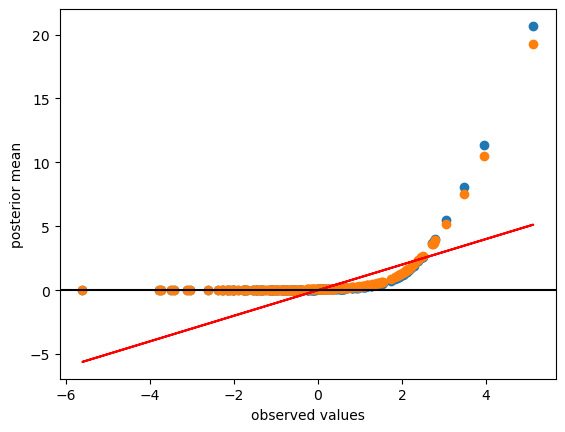

In [53]:
plt.scatter(betahat, res.post_mean2  )
plt.scatter(betahat, res3.post_mean2  )
plt.xlabel("observed values")
plt.plot(betahat, betahat, color='red', label='x = y')
plt.axhline(y=0, color="black")
plt.ylabel("posterior mean")

In [54]:
res3.log_lik

-395.95185295893646

In [55]:
res.log_lik

-396.4617224360055

In [56]:
import numpy as np

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise

# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.18015802 0.21591517 0.05061871 ... 0.0315807  0.00454364 0.18032576]
 [0.58523099 0.70138564 0.16443141 ... 0.10258774 0.01475969 0.58577589]
 [0.57085043 0.68415087 0.16039093 ... 0.10006691 0.01439701 0.57138193]
 ...
 [0.48250481 0.57827072 0.1355686  ... 0.08458041 0.01216891 0.48295406]
 [0.33535742 0.40191801 0.09422483 ... 0.05878629 0.00845781 0.33566966]
 [0.18176251 0.21783811 0.05106952 ... 0.03186196 0.0045841  0.18193174]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.10949163  0.29280705  0.20219263 ...  0.19763426 -0.02852504
   0.10313072]
 [ 0.57890485  0.49949152  0.17811737 ...  0.10280508 -0.0904326
   0.52759886]
 [ 0.64536588  0.71703588  0.35465421 ...  0.18170875  0.08918612
   0.58511911]
 ...
 [ 0.44937757  0.40659137  0.13654684 ...  0.09791766  0.12018342
   0.52798235]
 [ 0.29093614  0.34643367  0.15429731 ...  0.16886266 -0.03329688
   0.3922464 ]
 [ 0.20003181  0.21493078 -0.00923725 ...  0.21394221 -0.06686391
  -0.056

In [57]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [58]:
mycebmf= cEBMF(data    = noisy_matrix,
               prior_L = "exp",
               prior_F = "exp",K=10)
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

U, s, Vt = np.linalg.svd(mycebmf.data, full_matrices=False)
mycebmf.init_LF(use_nmf=True)
U
mycebmf.L
mycebmf.update_fitted_val

c:\Users\willi\anaconda3\envs\ml_env\lib\site-packages\sklearn\decomposition\_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


<bound method cEBMF_object.update_fitted_val of <cEBMF.cEBMF_object object at 0x0000027246126BF0>>

In [59]:
k=0

In [60]:


mycebmf.cal_partial_residuals(k=k)
lhat, s_l = compute_hat_l_and_s_l(mycebmf.Rk, mycebmf.F[:, k], mycebmf.F2[:, k], mycebmf.tau, mycebmf.has_nan) 


In [61]:
betahat=lhat
sebetahat  = s_l

In [62]:
betahat/sebetahat

array([-1.03524076e-02,  3.68049026e+00,  3.87963605e+00, -4.47525717e-02,
        6.52271509e+00, -1.02446094e-01,  5.91019630e+00, -1.17261782e-01,
       -2.14822084e-01,  2.75854897e+00,  7.10802794e+00,  2.62735438e+00,
        5.84657383e+00, -8.13782364e-02,  4.27431679e+00, -4.53590482e-01,
        1.31900036e+00,  9.50460148e+00,  3.19781661e+00,  1.57036769e+00,
        9.41260338e+00,  1.47200629e-01,  7.54318094e+00,  4.96846676e+00,
       -8.59312862e-02,  4.64166975e+00,  8.34093094e+00, -2.32452065e-01,
        5.14621973e+00,  4.66343164e+00, -8.28749761e-02,  3.32880402e+00,
        7.09312630e+00,  2.86686635e+00, -1.33798778e-01,  5.17823744e+00,
        9.25755024e+00,  7.45997477e+00,  7.39532518e+00, -8.80467296e-02,
        1.16365023e+01,  1.11986625e+00,  1.74632788e+00,  5.47069693e+00,
       -2.68342316e-01,  6.25418520e+00,  7.52853060e+00,  1.37066066e+00,
        1.35388064e+00, -3.86208147e-01], dtype=float32)

In [63]:
res= ash(betahat, sebetahat, prior="exp")
print(res.pi )
res3=ebnm_point_exp_solver(x=betahat, s=sebetahat)

C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine.py:87: RuntimeWarning: invalid value encountered in multiply
  alpha_frac = alpha * np.exp( np.clip(stats.norm.logpdf(alpha) - pnorm_diff, None, 300))
C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine.py:89: RuntimeWarning: invalid value encountered in multiply
  beta_frac = beta * np.exp( np.clip(stats.norm.logpdf(beta) - pnorm_diff, None, 300))
C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine.py:107: RuntimeWarning: invalid value encountered in add
  upper_bd2 = (alpha ** 2 + alpha * beta + beta ** 2) / 3


[3.85552536e-01 1.56541845e-10 1.57239837e-10 1.57624753e-10
 1.57490969e-10 1.57160940e-10 1.58553667e-10 1.66961853e-10
 1.94644504e-10 2.72534722e-10 6.42108708e-09 1.03046117e-03
 5.03777945e-01 1.09627323e-01 1.17265088e-05 3.65404897e-10
 1.78996513e-10]


Text(0, 0.5, 'posterior mean')

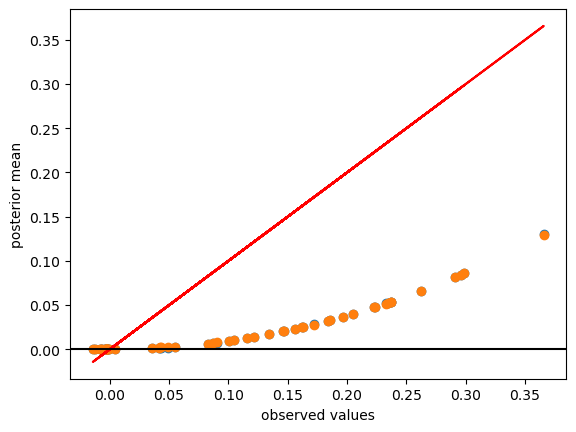

In [64]:
plt.scatter(betahat, res.post_mean2  )
plt.scatter(betahat, res3.post_mean2  )
plt.xlabel("observed values")
plt.plot(betahat, betahat, color='red', label='x = y')
plt.axhline(y=0, color="black")
plt.ylabel("posterior mean")

In [65]:
mycebmf.L[:, k] = res .post_mean
mycebmf.L2[:, k] = res .post_mean2 

In [66]:




fhat, s_f = compute_hat_f_and_s_f(mycebmf.Rk, mycebmf.L[:, k], mycebmf.L2[:, k], mycebmf.tau, mycebmf.has_nan)
betahat=fhat
sebetahat=s_f

In [67]:
res= ash(betahat, sebetahat, prior="exp")
res.pi 
res3=ebnm_point_exp_solver(x=betahat, s=sebetahat)

Text(0, 0.5, 'posterior mean')

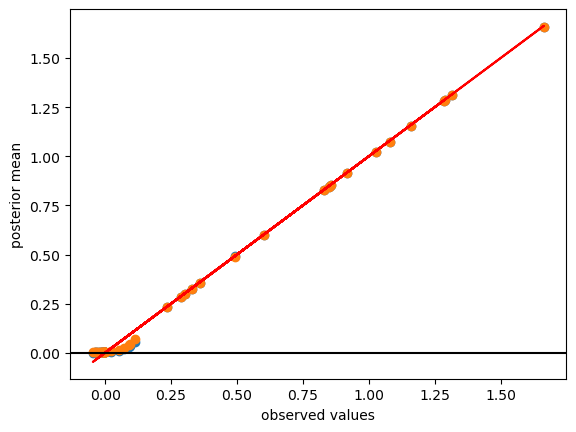

In [68]:
plt.scatter(betahat, res.post_mean  )
plt.scatter(betahat, res3.post_mean  )
plt.xlabel("observed values")
plt.plot(betahat, betahat, color='red', label='x = y')
plt.axhline(y=0, color="black")
plt.ylabel("posterior mean")

In [69]:
fhat

array([ 1.15915108e+00,  1.28373301e+00,  3.59166175e-01, -2.31842371e-03,
       -3.64835537e-03,  1.13233887e-01,  4.94410276e-01,  9.41358209e-02,
       -1.49621405e-02,  6.02569640e-01,  1.66364121e+00,  7.27354884e-02,
        9.17294145e-01, -3.93214123e-03,  5.08056395e-02, -1.65219721e-03,
        8.56690645e-01, -2.51892600e-02,  2.36068338e-01,  1.31654274e+00,
        9.05246809e-02,  8.47698830e-04,  1.02871370e+00,  3.29361767e-01,
        1.07928884e+00, -4.66702506e-02, -3.61658335e-02,  5.18780609e-04,
        8.47753823e-01,  2.04213001e-02,  8.54356945e-01, -1.13170445e-02,
       -9.31621715e-03, -8.02637823e-03,  1.28975022e+00,  3.02312851e-01,
        2.88041353e-01, -3.86099555e-02, -2.05687582e-02,  8.31966460e-01],
      dtype=float32)

In [70]:

mycebmf.F[:, k] = res.post_mean
mycebmf.F2[:, k] = res .post_mean2 

In [71]:
k=k+1

In [72]:
k=1


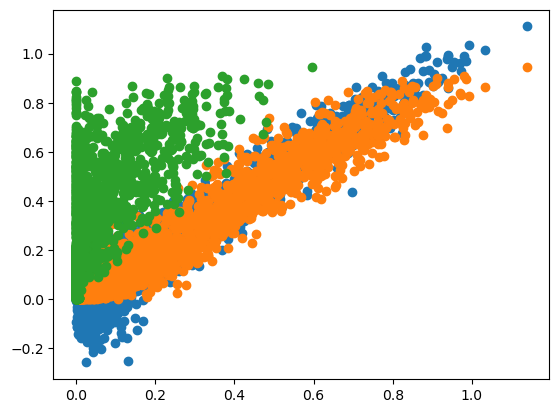

In [73]:
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix) 
 